# Monte Carlo Simulation Example

A firm is considering producing and selling a new product under a pure/perfect competition market and the firm wants to know the probability distribution for the profit associated with this product. 

The total profit is given by the equation:

TP = (Q X P) - (Q X V + F)

where TP is the Total Profit, Q is the Quantity Sold, P is the Selling Price, V is the Variable Cost and F is the Fixed Cost. 

Since the firm is predicting what will happen if they produce the product, some of the profit components are uncertain. In particuler, Q, P and V are estimated to be random variables with the following distributions:

- Q: uniform (8000,12000)
- P: normal (10,3)
- V: normal (7,2)

F is fixed at 5000.

The goal is to use Monte Carlo Simulation to estimate various descriptive statistics about the total profit associated with the product (if the project were undertaken) and to ultimately provide information to aid a decision-maker in deciding whether or not to pursue the project

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Expected Value from 1,000,000 replication: 24,992.88


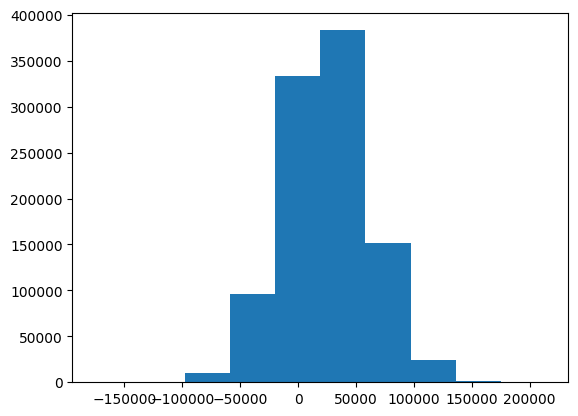

In [28]:
# Nummber of obersevations
obs = 1000_000

# Generate input vectors
fixed = 5000

price = np.random.normal(10, 3, obs)

marginal = np.random.normal(7, 2, obs)

demand = np.random.uniform(8000, 12000, obs)

# Compute the expected profit for each replication (using vector operations)
tp = demand * (price - marginal) - fixed

# Basic display of the results
print(f"Expected Value from {obs:,d} replication: {np.mean(tp):,.2f}")

plt.figure()
plt.hist(tp)
plt.show()

In [29]:
print(f"Expected Profit: {tp.mean():,.2f}")
print(f"Standard Deviation: {tp.std():,.2f}")
print(f"25th Percentile: {np.percentile(tp,25):,.2f}")
print(f"75th Percentile: {np.percentile(tp,75):,.2f}")
print(f"Probability of Losing Money: {np.sum(tp<0)/obs:,.4f}")
print(f"Probability of Winning Money > $100,000: {np.sum(tp>100_000)/obs:,.4f}")

Expected Profit: 24,992.88
Standard Deviation: 36,424.73
25th Percentile: 576.52
75th Percentile: 48,948.31
Probability of Losing Money: 0.2448
Probability of Winning Money > $100,000: 0.0220


# Aggregate the Individual Arrays into A Single Experiment

In [34]:
# Create 4 single-column arrays
p = price.reshape(obs,1)
m = marginal.reshape(obs,1)
d = demand.reshape(obs,1)
pr = tp.reshape(obs,1)
p.shape, m.shape, d.shape, pr.shape

((1000000, 1), (1000000, 1), (1000000, 1), (1000000, 1))

In [37]:
# Concat the four into a matrix 
a = np.concatenate([p,m,d,pr], axis=1)
a.shape

(1000000, 4)

In [38]:
a.mean(axis=0)

array([1.00004887e+01, 7.00060986e+00, 9.99829245e+03, 2.49928753e+04])